In [1]:
!nvidia-smi

Fri Jun  7 09:46:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

In [4]:
from IPython.display import display, Image
import ultralytics

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://www.abc27.com/wp-content/uploads/sites/55/2022/09/GettyImages-148421596-e1662562076357.jpg'

/content
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://www.abc27.com/wp-content/uploads/sites/55/2022/09/GettyImages-148421596-e1662562076357.jpg locally at GettyImages-148421596-e1662562076357.jpg
image 1/1 /content/GettyImages-148421596-e1662562076357.jpg: 384x640 21 cars, 1 parking meter, 108.5ms
Speed: 4.6ms preprocess, 108.5ms inference, 625.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


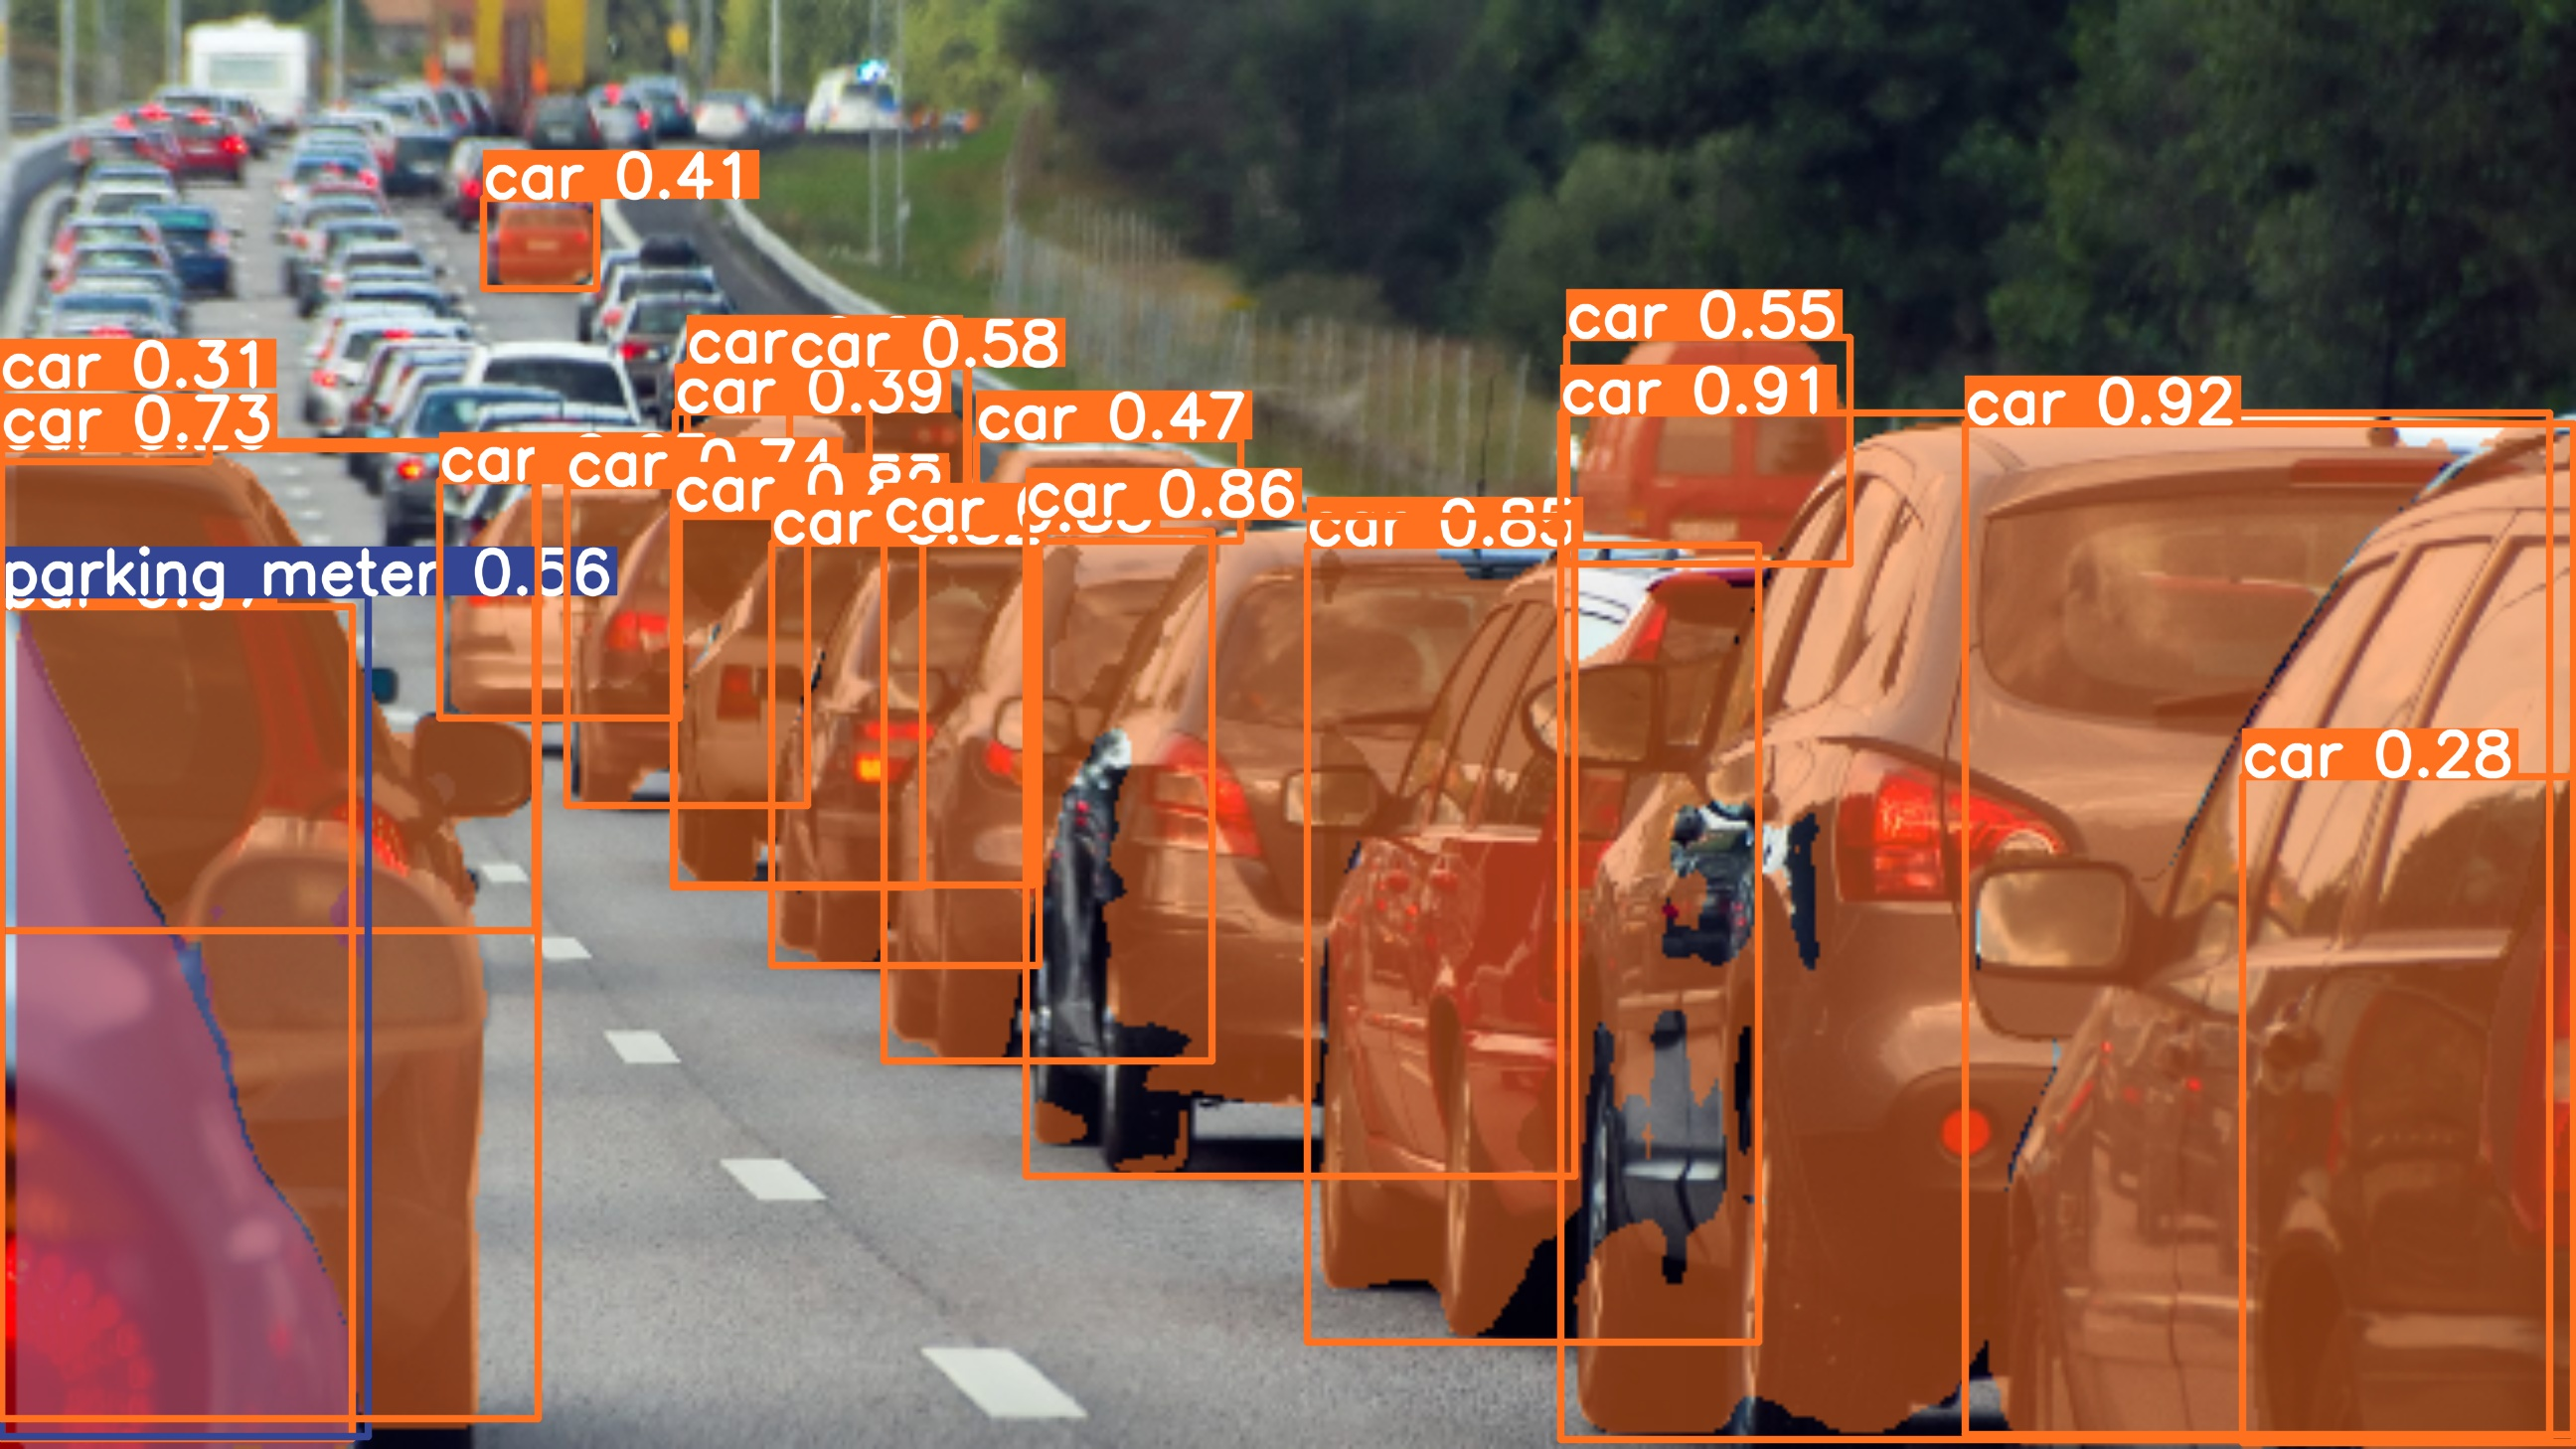

In [6]:
Image('/content/runs/segment/predict/GettyImages-148421596-e1662562076357.jpg')

In [7]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8x-seg.pt  source='https://www.abc27.com/wp-content/uploads/sites/55/2022/09/GettyImages-148421596-e1662562076357.jpg'

/content
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

Found https://www.abc27.com/wp-content/uploads/sites/55/2022/09/GettyImages-148421596-e1662562076357.jpg locally at GettyImages-148421596-e1662562076357.jpg
image 1/1 /content/GettyImages-148421596-e1662562076357.jpg: 384x640 16 cars, 90.3ms
Speed: 3.4ms preprocess, 90.3ms inference, 546.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


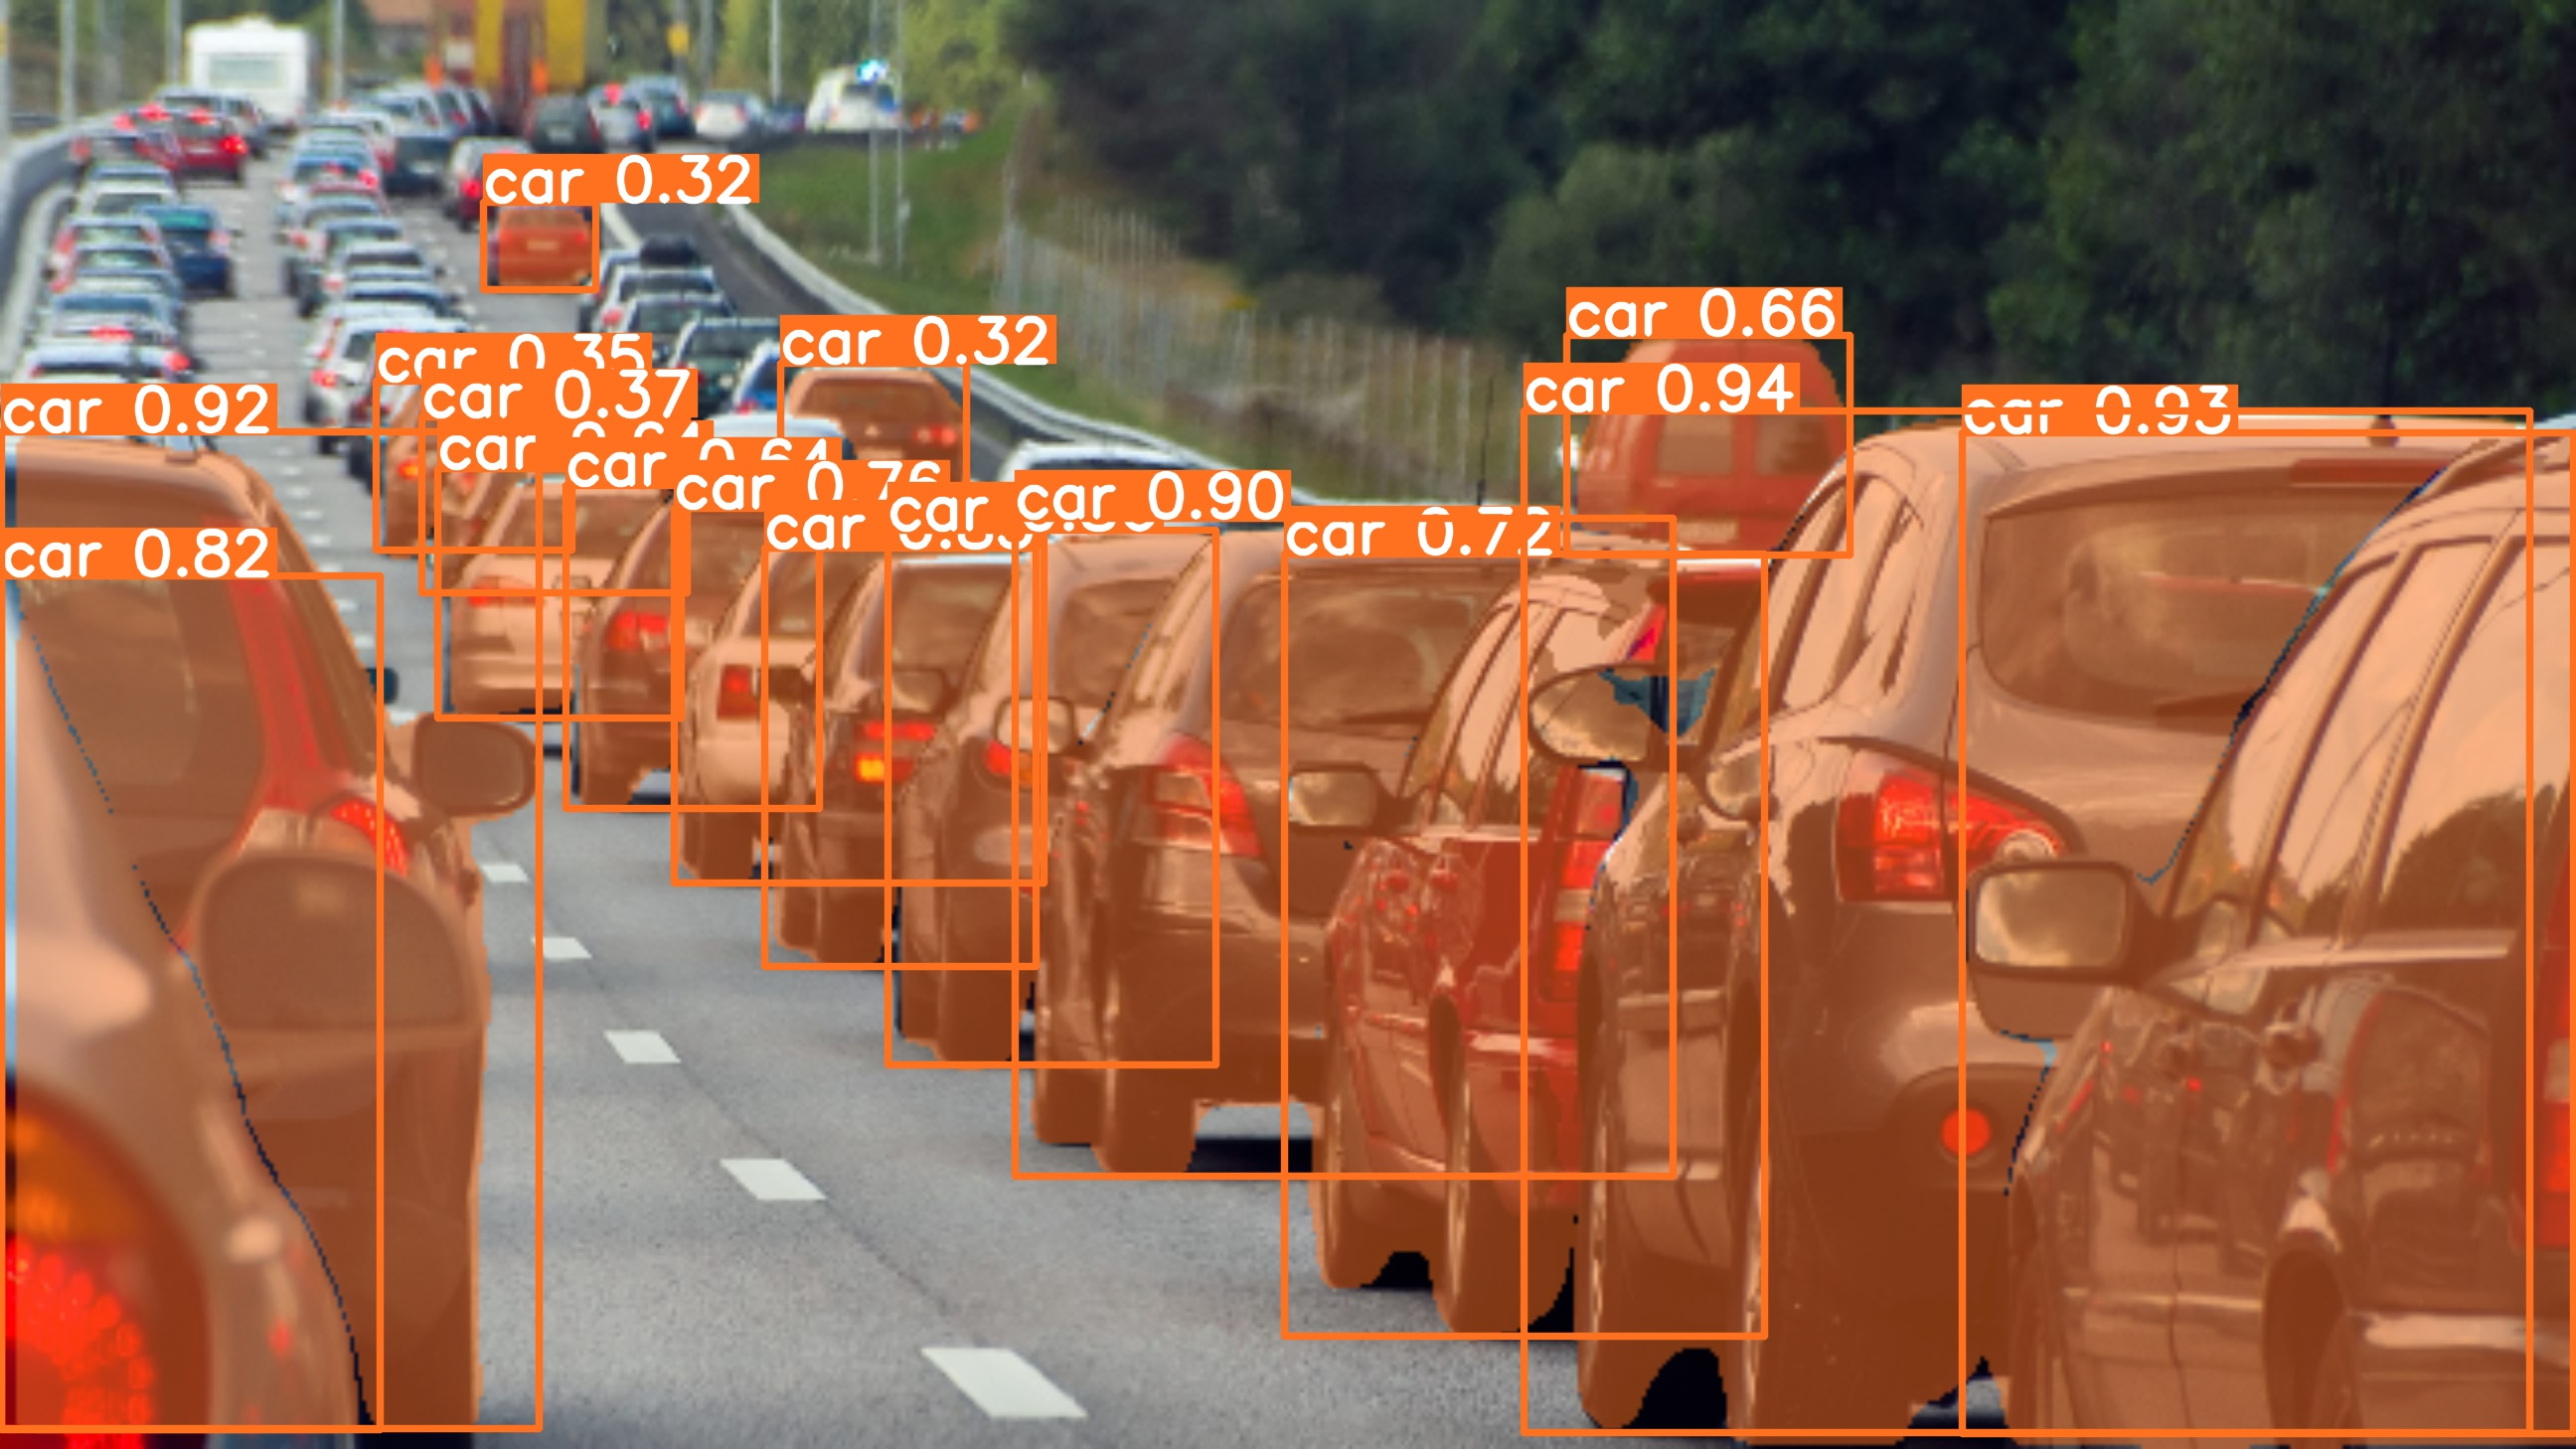

In [8]:
Image('/content/runs/segment/predict2/GettyImages-148421596-e1662562076357.jpg')

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="waio5nPem42gbm5PciaC")
project = rf.workspace("uabc-auri0").project("breast-segmentation-dxcby")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`


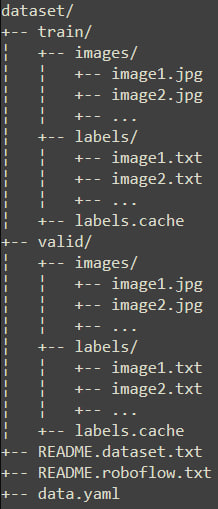

In [12]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data='/content/Breast-Segmentation-3/data.yaml' epochs=100 imgsz=640

/content
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Breast-Segmentation-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

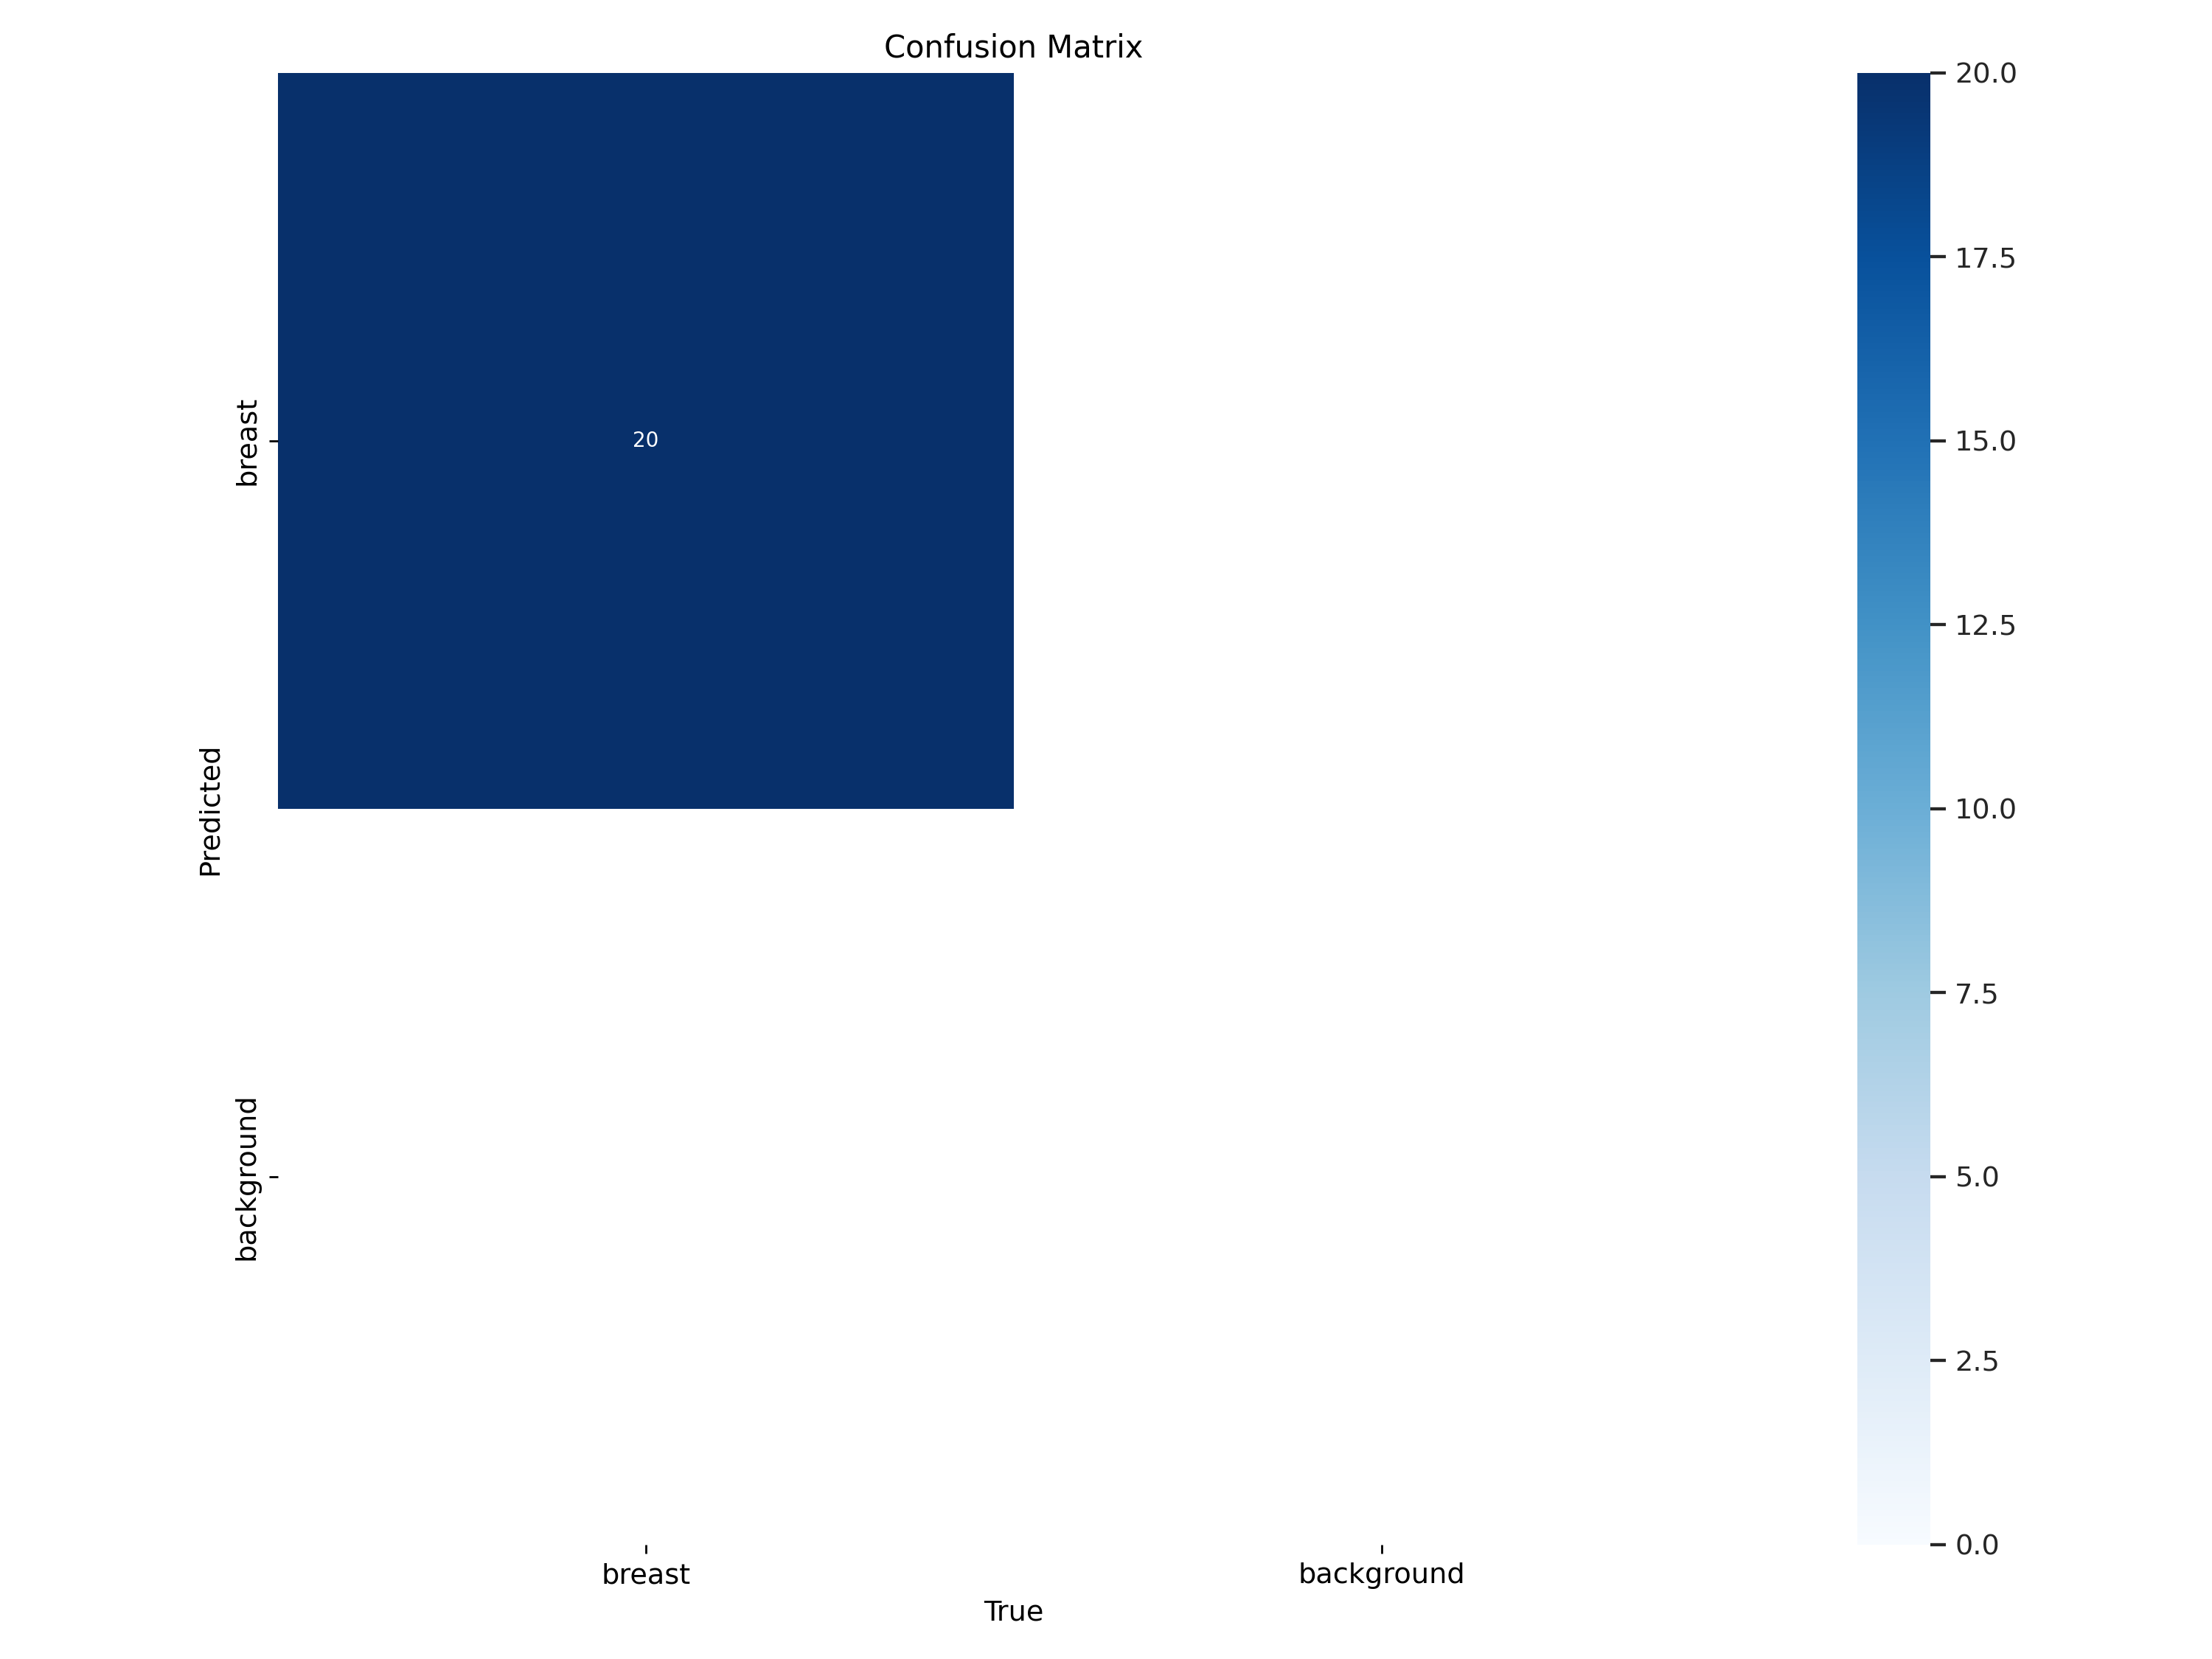

In [14]:
Image('/content/runs/segment/train4/confusion_matrix.png',width=500)

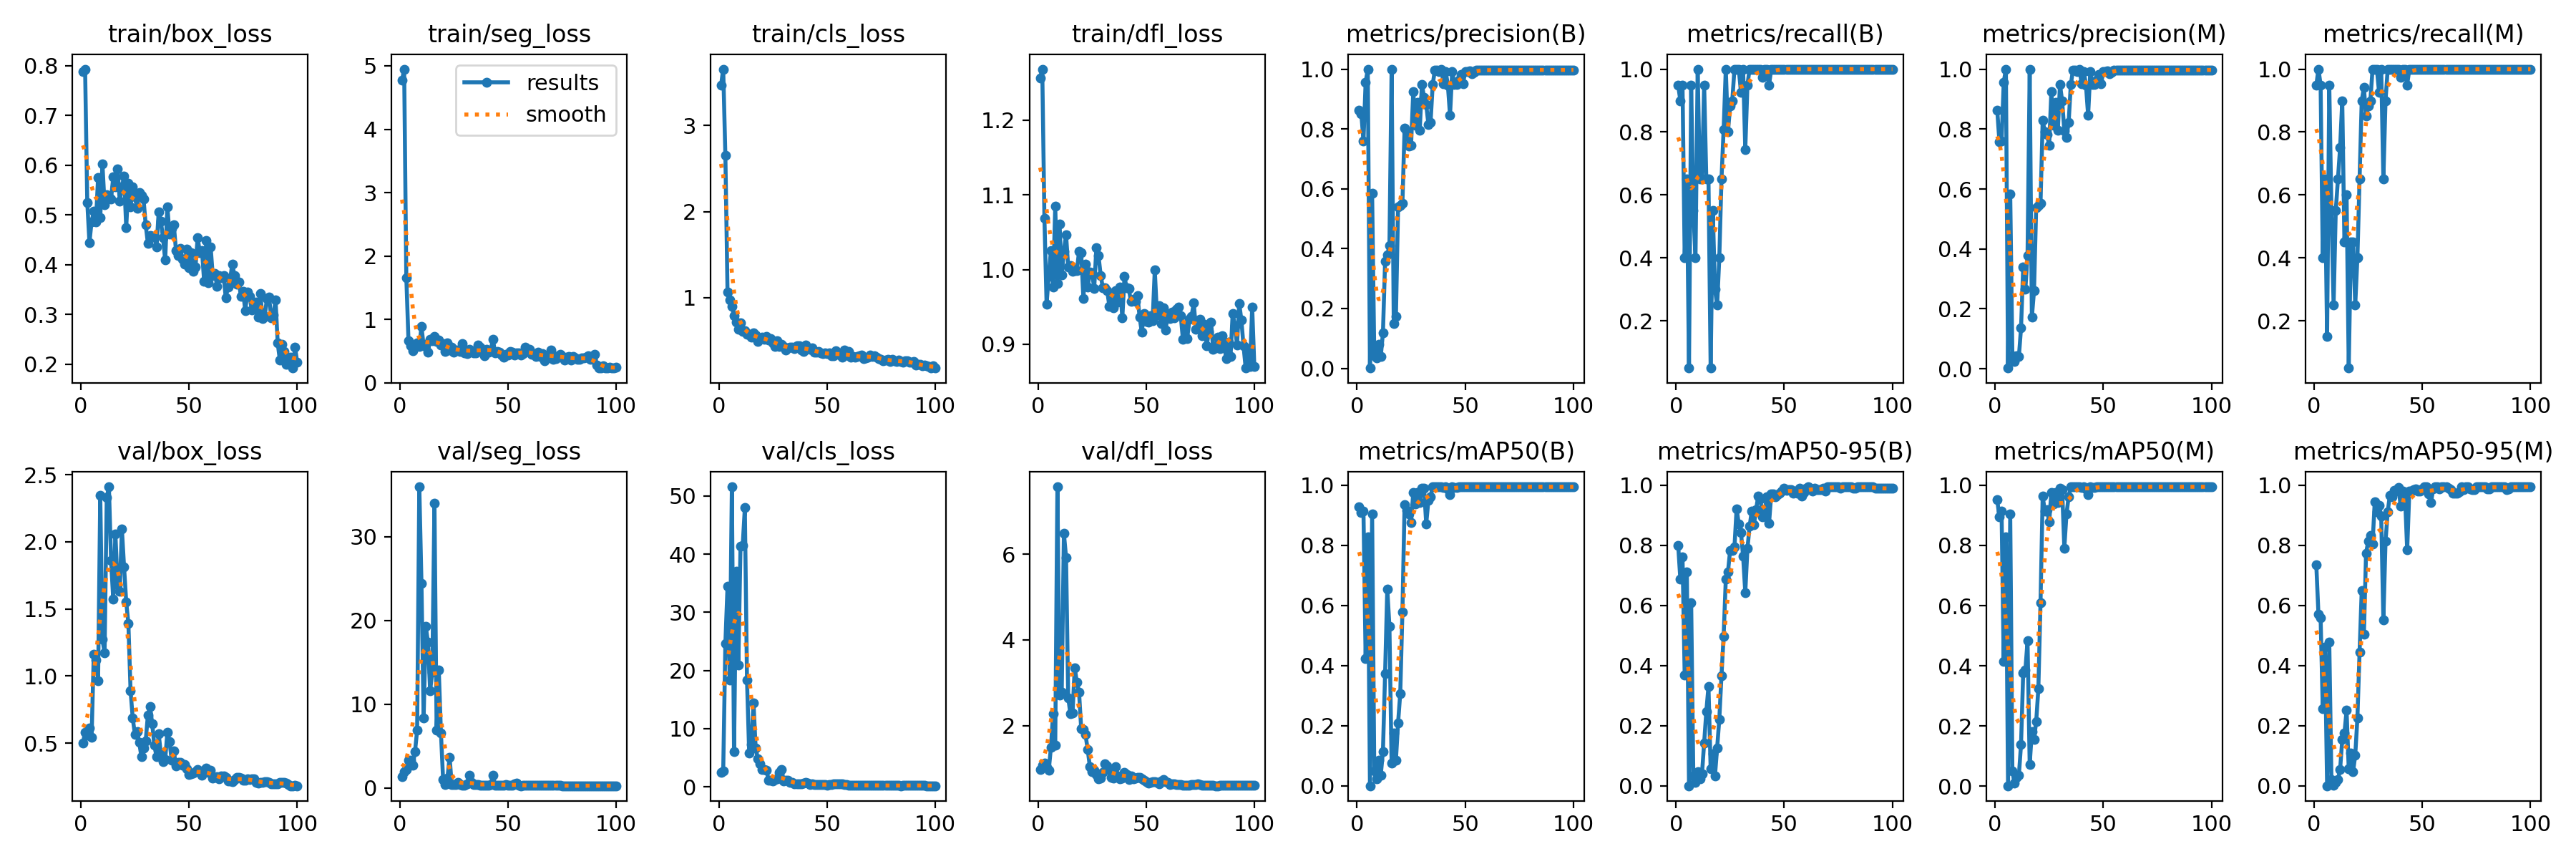

In [15]:
Image('/content/runs/segment/train4/results.png')

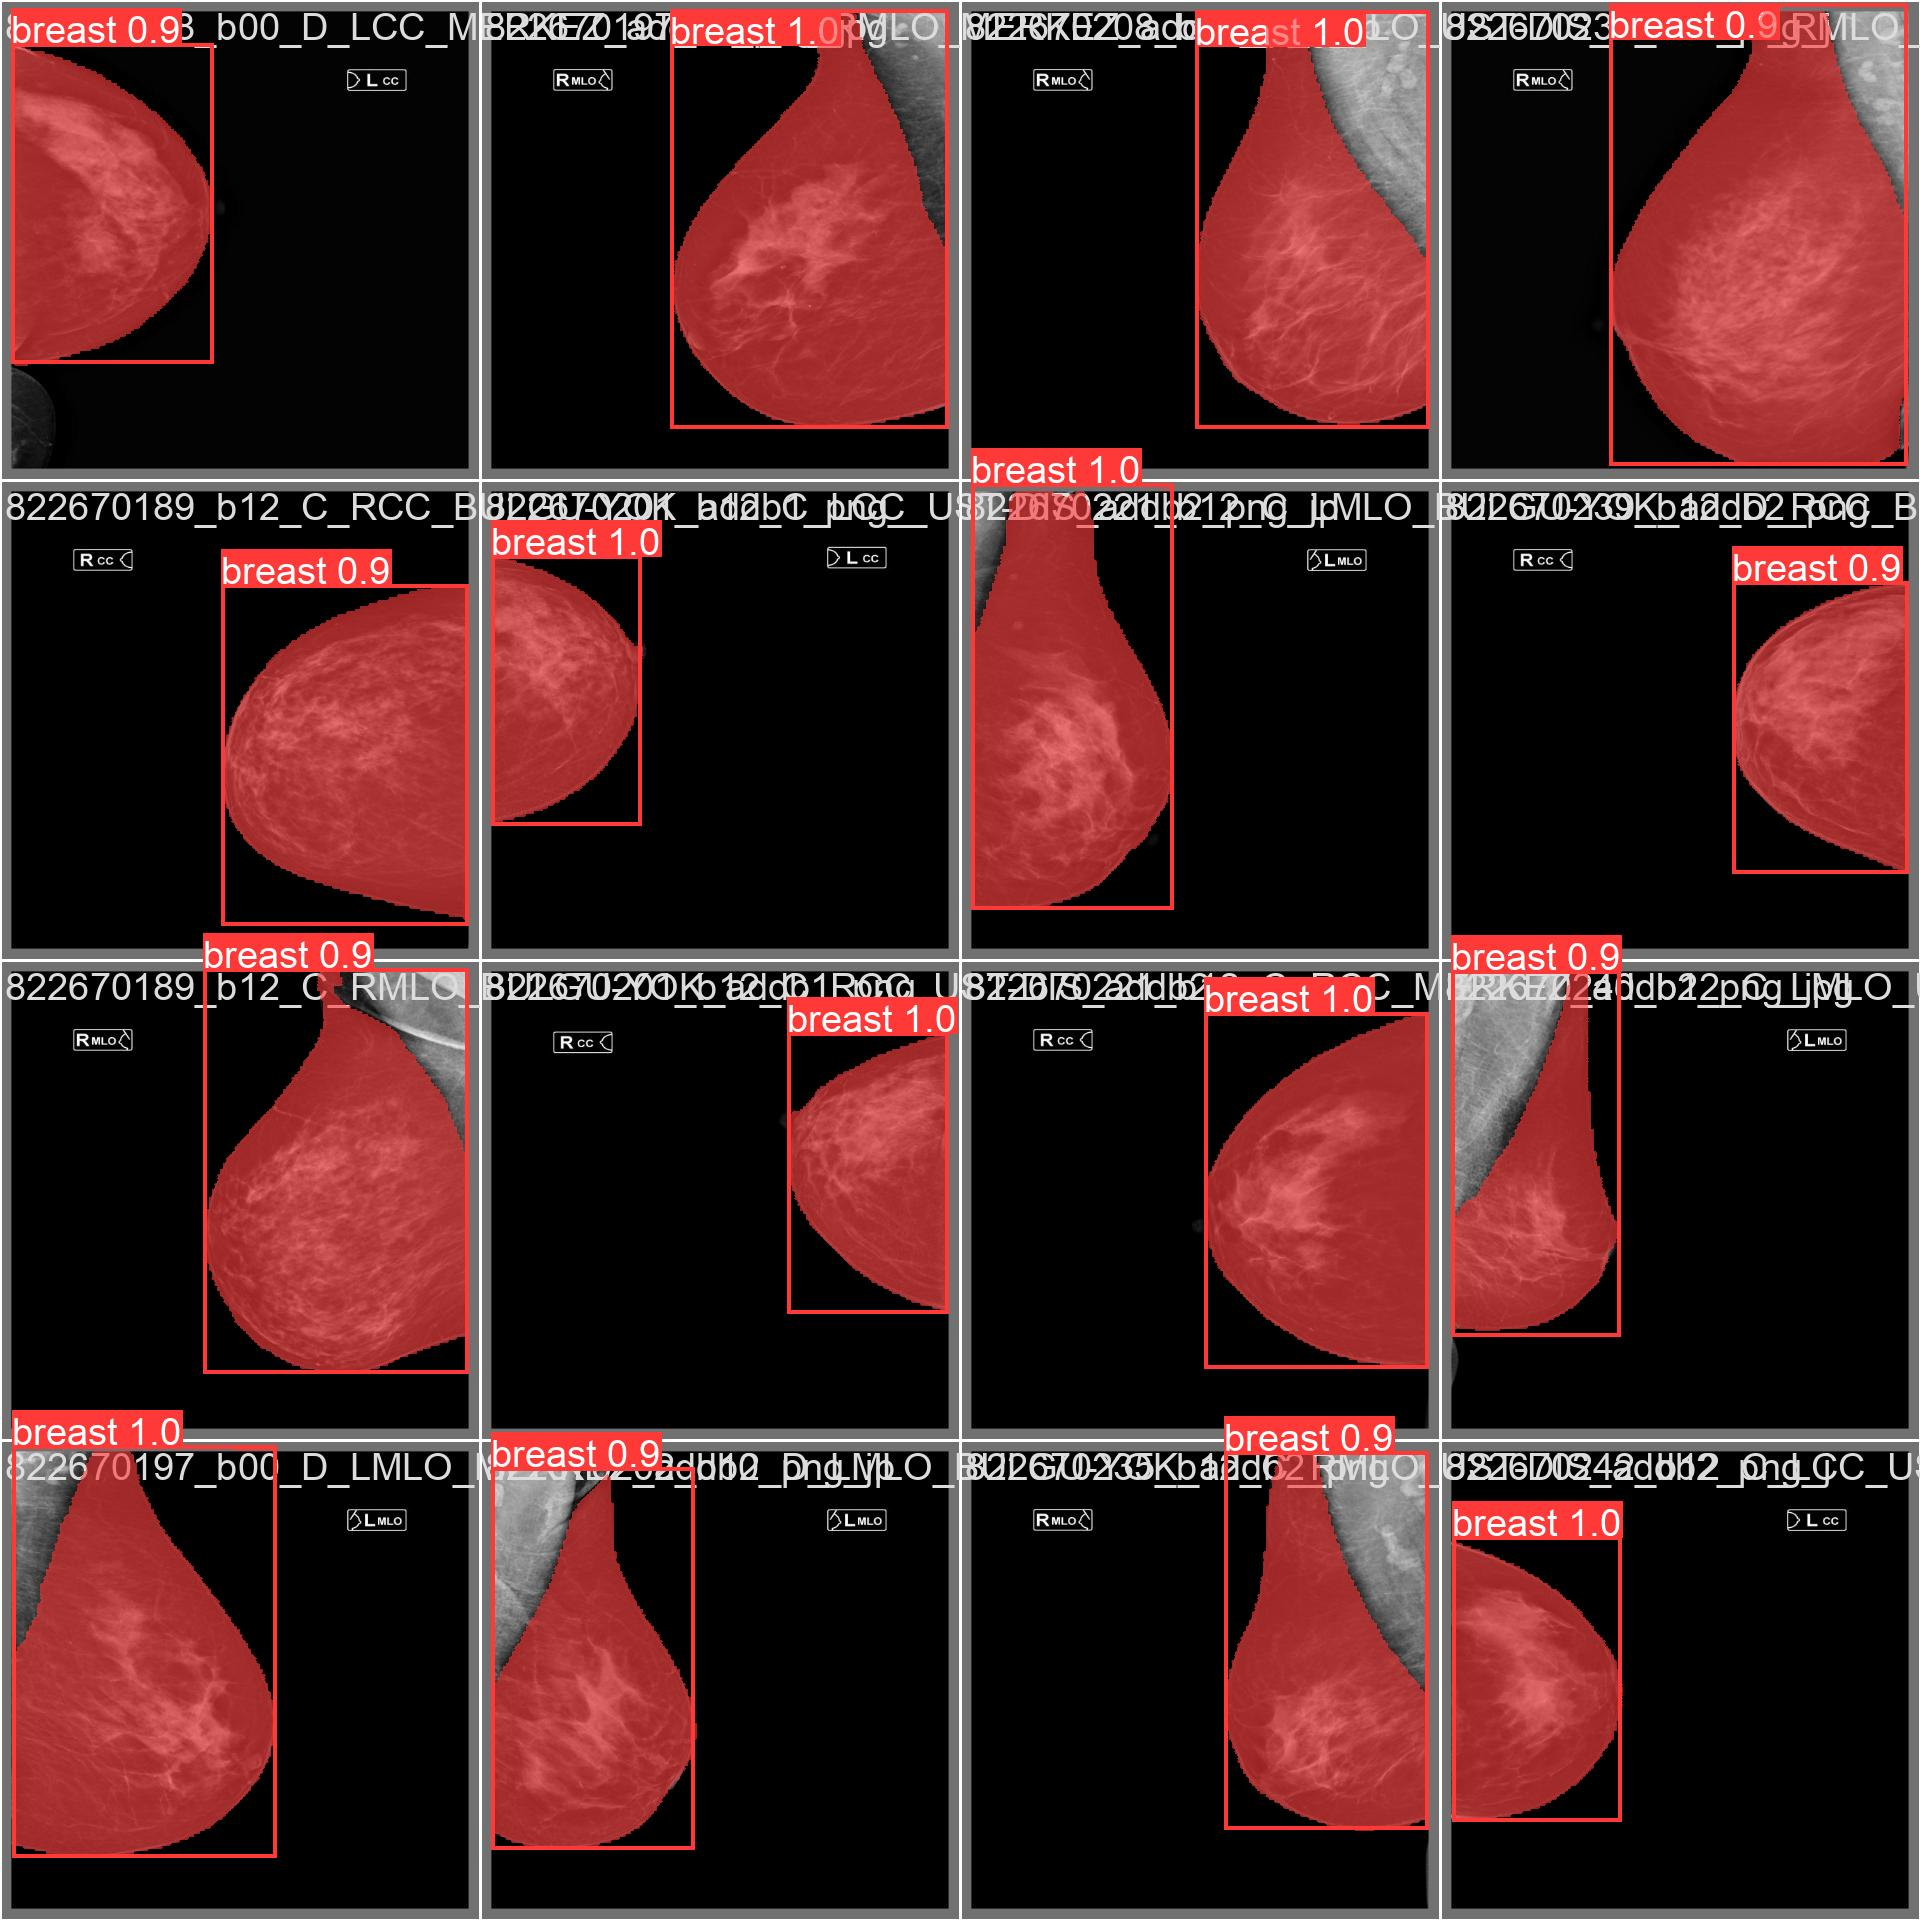

In [17]:
Image('/content/runs/segment/train4/val_batch0_pred.jpg')

In [25]:
!yolo segment val model='/content/runs/segment/train4/weights/best.pt' data='/content/Breast-Segmentation-3/data.yaml'

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/Breast-Segmentation-3/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.16it/s]
                   all         20         20      0.997          1      0.995      0.995      0.997          1      0.995      0.995
Speed: 0.6ms preprocess, 36.0ms inference, 0.0ms loss, 30.4ms postprocess per image
Results saved to runs/segment/val7
💡 Learn more at https://docs.ultralytics.com/modes/val


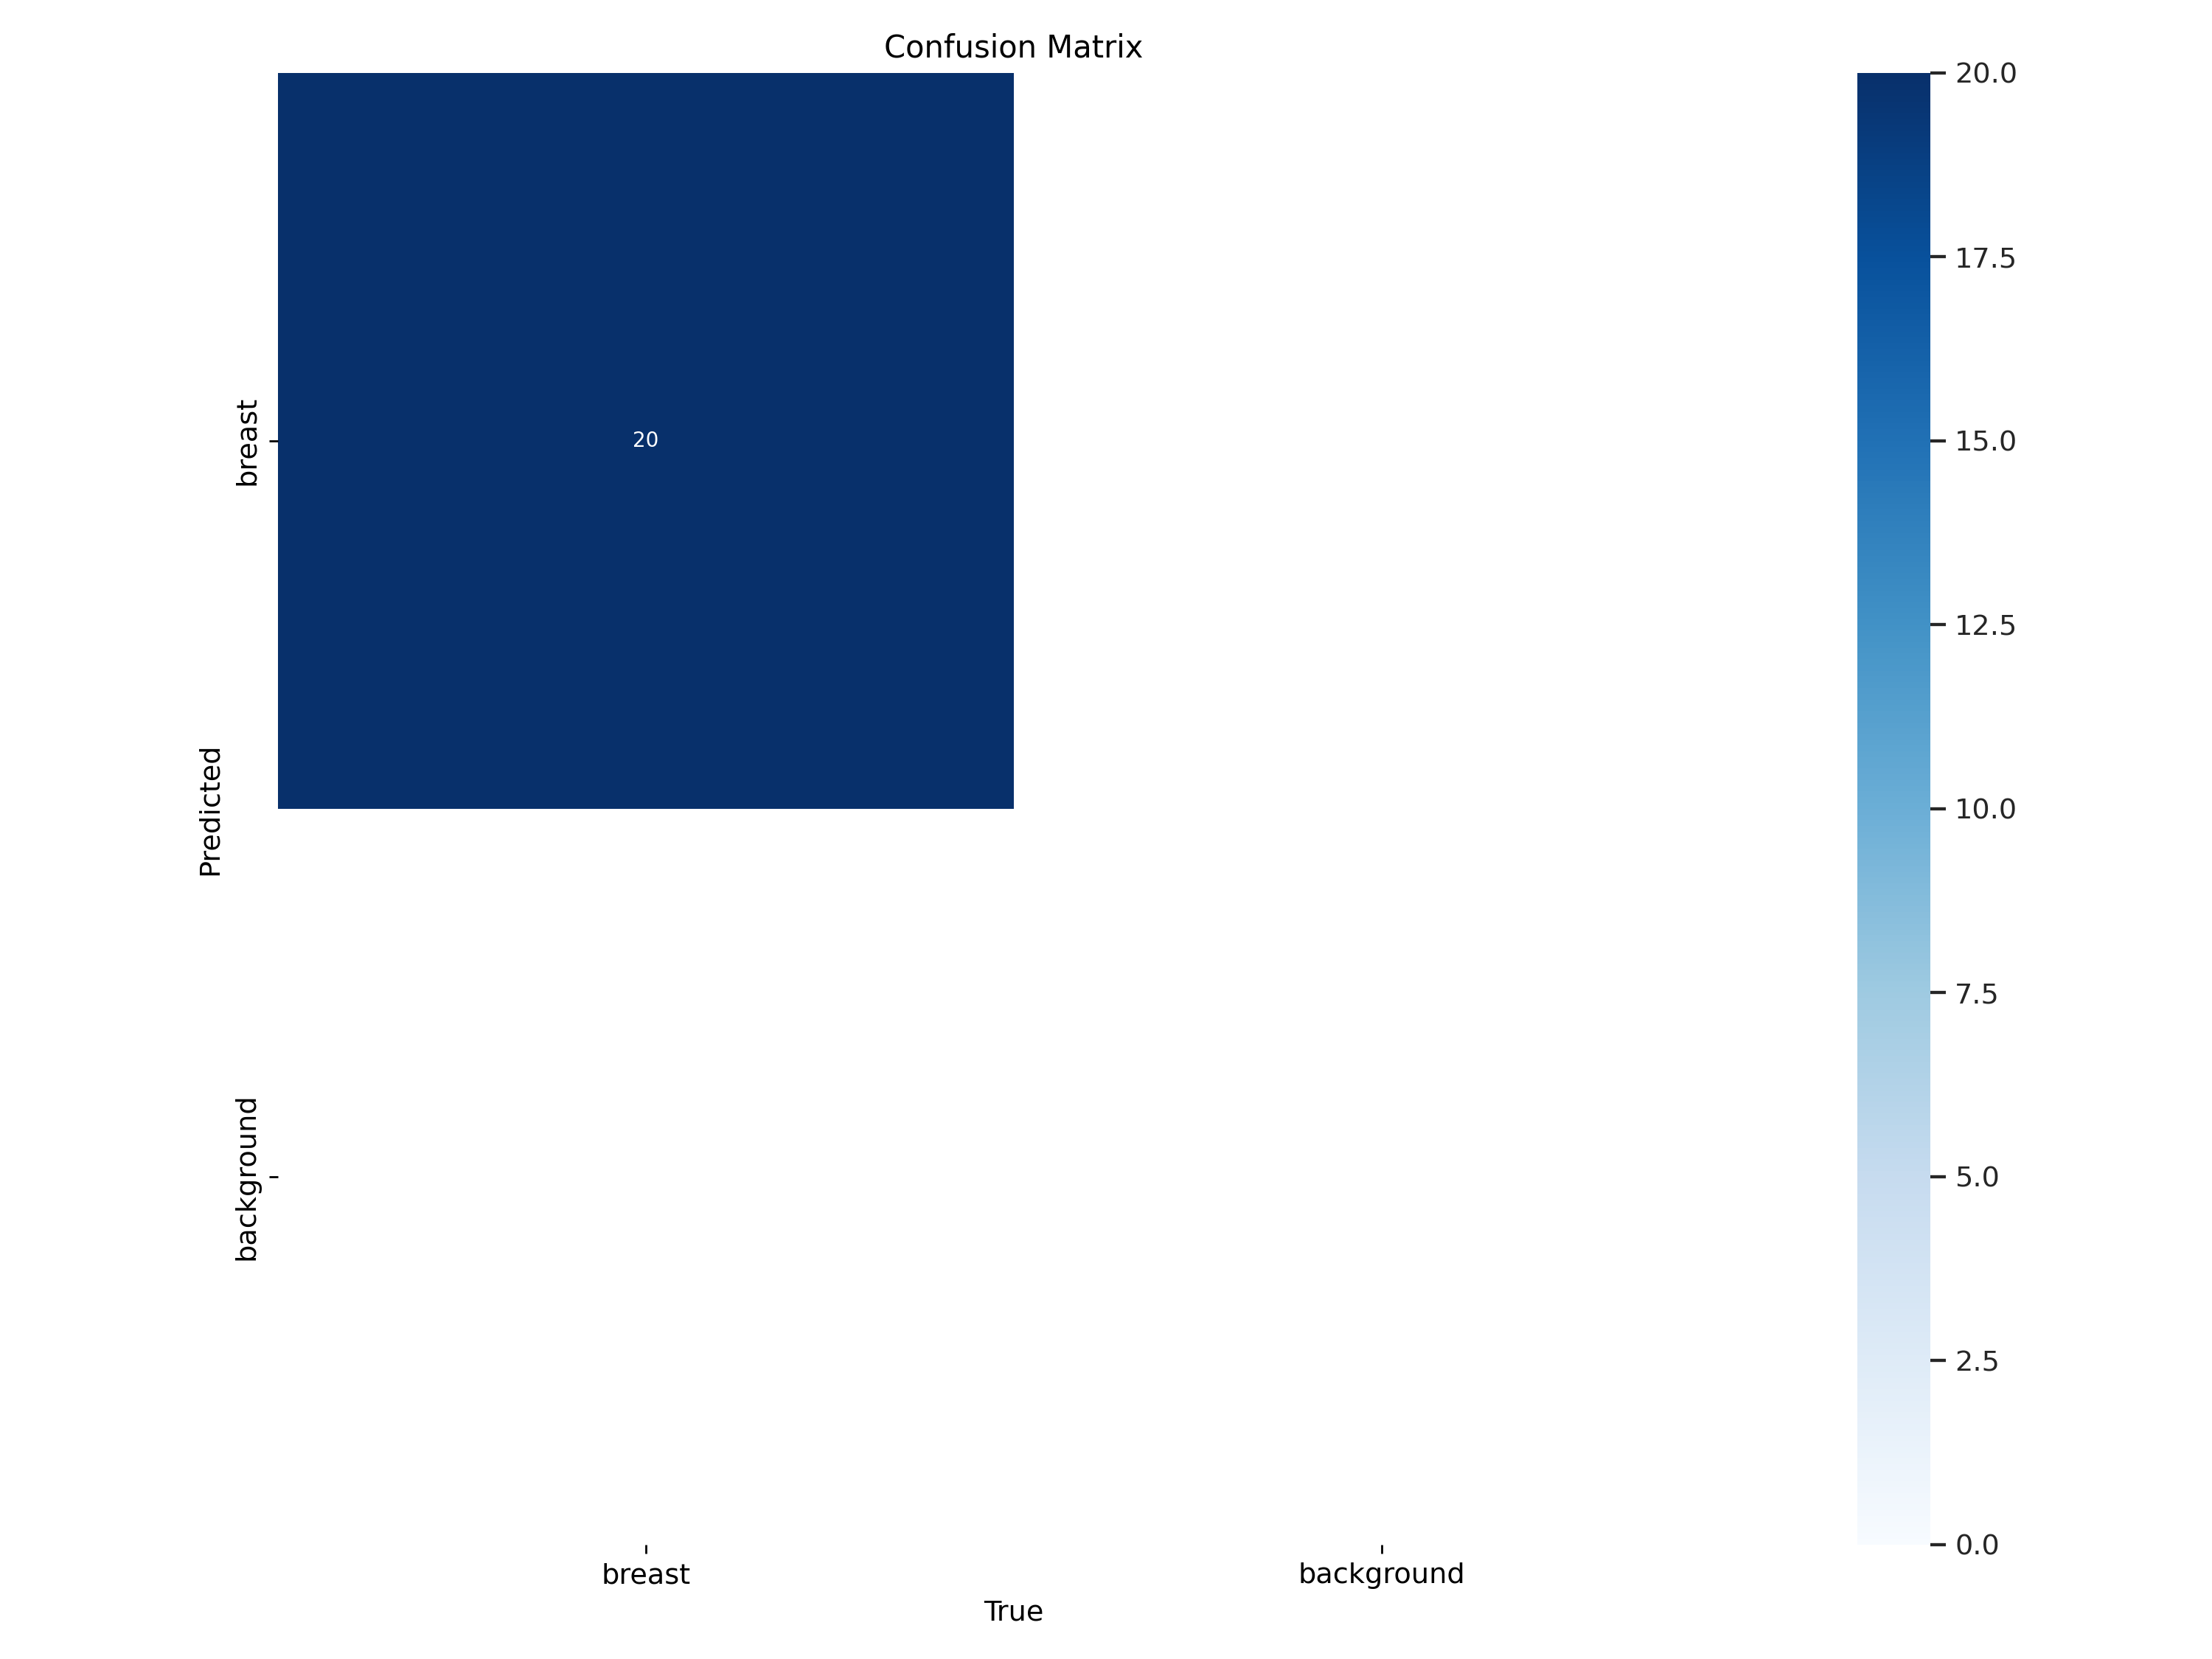

In [27]:
Image('/content/runs/segment/val7/confusion_matrix.png',width=600)

In [28]:
!yolo segment predict model='/content/runs/segment/train4/weights/best.pt' source='https://pcdn.columbian.com/wp-content/uploads/2022/10/1012057897-dense-breast-tissue_104.jpg'

Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

100% 376k/376k [00:01<00:00, 325kB/s]
image 1/1 /content/1012057897-dense-breast-tissue_104.jpg: 640x640 2 breasts, 27.8ms
Speed: 10.5ms preprocess, 27.8ms inference, 956.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


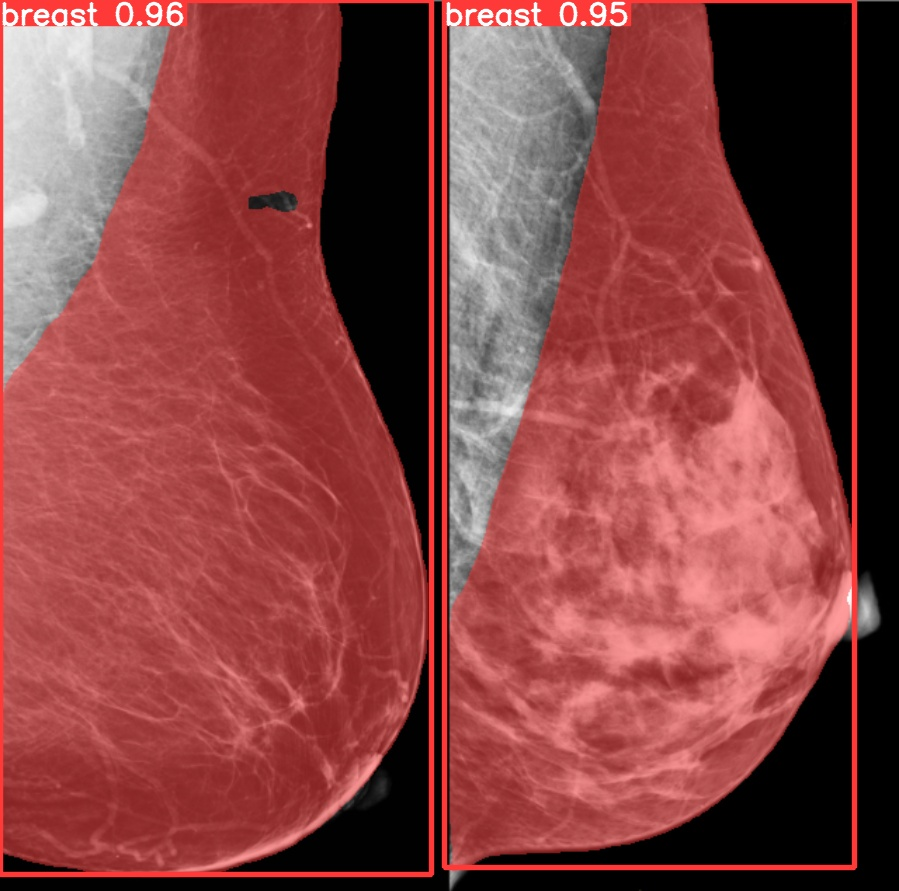

In [32]:
Image('/content/runs/segment/predict5/1012057897-dense-breast-tissue_104.jpg',width=600,height=400)